## Connect Nodes

In this notebook, I am using `nest.ConnectLayers` to create some connection between nodes.

In [1]:
import nest
import nest.topology as topp
import matplotlib.pyplot as plt

In [23]:
print(plt.style.available)
plt.style.use('seaborn-poster')


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


### Create Layer

In [2]:
ex_layer_dict = {"extent" : [2.,2.], # the size of the layer in mm
                 "rows" : 10, # the number of rows in this layer ...
                 "columns" : 10, # ... and the number of columns
                 "elements" : "iaf_psc_alpha",
                 "edge_wrap" : True} # the element at each (x,y) coordinate in the grid

In [3]:
ex_layer = topp.CreateLayer(ex_layer_dict)

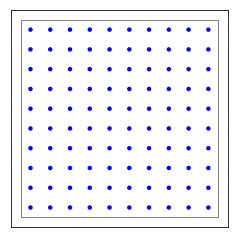

In [4]:
topp.PlotLayer(ex_layer)

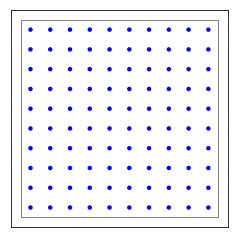

In [5]:
nest.PrintNetwork(depth=1)
plt.show()

### Connect

In this section we connect the nodes without weight specifications.

In [6]:
ex_conndict = { 'connection_type': 'divergent', 'mask': { 'grid': {'rows':3, 'columns': 3}, 'anchor': {'row':1, 'column':1} } }

In [7]:
topp.ConnectLayers(ex_layer, ex_layer, ex_conndict)

The GID of a specific node can be printed using `nest.GetElement`

In [8]:
nest.GetNodes(ex_layer);
topp.GetElement(ex_layer, [5,5])


/Users/leima/nest/lib/python3.6/site-packages/nest/lib/hl_api_helper.py:92: UserWarning: 
GetNodes is deprecated and will be removed in NEST 3.0. Use GIDCollection instead.
  warnings.warn('\n' + text)   # add LF so text starts on new line


(57,)

Visualization of connect nodes at a specific GID is done using `topology.PlotTargets`

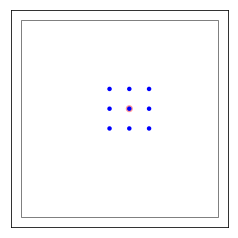

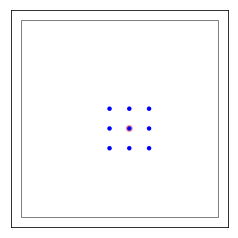

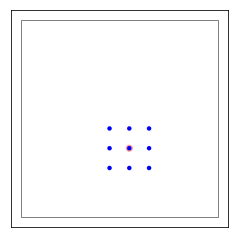

In [9]:
for i in [56, 57, 58]:
    topp.PlotTargets([i], ex_layer)
    plt.show()

The visualization confirms that the connect is going as we expected.

### Set Weights

In this section, we create a connection dictionary that specifies the weights.

In [10]:
nest.Models(mtype='synapses')

('bernoulli_synapse',
 'bernoulli_synapse_lbl',
 'cont_delay_synapse',
 'cont_delay_synapse_hpc',
 'cont_delay_synapse_lbl',
 'diffusion_connection',
 'diffusion_connection_lbl',
 'gap_junction',
 'gap_junction_lbl',
 'ht_synapse',
 'ht_synapse_hpc',
 'ht_synapse_lbl',
 'quantal_stp_synapse',
 'quantal_stp_synapse_hpc',
 'quantal_stp_synapse_lbl',
 'rate_connection_delayed',
 'rate_connection_delayed_lbl',
 'rate_connection_instantaneous',
 'rate_connection_instantaneous_lbl',
 'static_synapse',
 'static_synapse_hom_w',
 'static_synapse_hom_w_hpc',
 'static_synapse_hom_w_lbl',
 'static_synapse_hpc',
 'static_synapse_lbl',
 'stdp_dopamine_synapse',
 'stdp_dopamine_synapse_hpc',
 'stdp_dopamine_synapse_lbl',
 'stdp_facetshw_synapse_hom',
 'stdp_facetshw_synapse_hom_hpc',
 'stdp_facetshw_synapse_hom_lbl',
 'stdp_pl_synapse_hom',
 'stdp_pl_synapse_hom_hpc',
 'stdp_pl_synapse_hom_lbl',
 'stdp_synapse',
 'stdp_synapse_hom',
 'stdp_synapse_hom_hpc',
 'stdp_synapse_hom_lbl',
 'stdp_synapse_hpc

In [19]:
nest.GetDefaults("stdp_synapse")

{'Wmax': 100.0,
 'alpha': 1.0,
 'delay': 1.0,
 'has_delay': True,
 'lambda': 0.01,
 'mu_minus': 1.0,
 'mu_plus': 1.0,
 'num_connections': 900,
 'receptor_type': 0,
 'requires_symmetric': False,
 'sizeof': 88,
 'synapse_model': <SLILiteral: stdp_synapse>,
 'tau_plus': 20.0,
 'weight': 1.0,
 'weight_recorder': -1}

In [16]:
ex_conndict_w = { 'connection_type': 'divergent', 'mask': { 'grid': {'rows':3, 'columns': 3}, 'anchor': {'row':1, 'column':1} }, 'weights': 1.,'synapse_model': 'stdp_synapse' }

In [17]:
topp.ConnectLayers(ex_layer, ex_layer, ex_conndict_w)

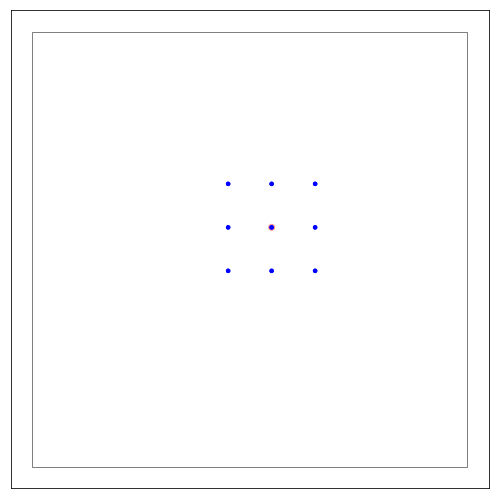

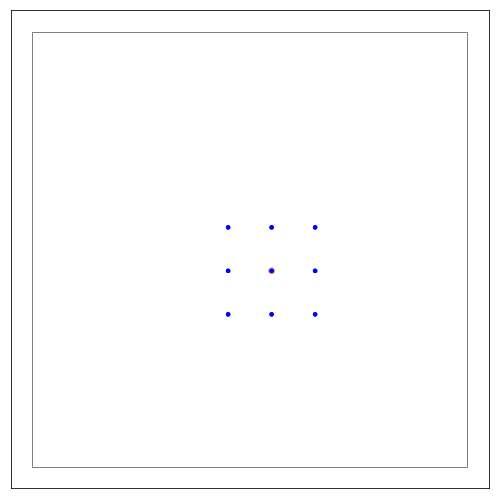

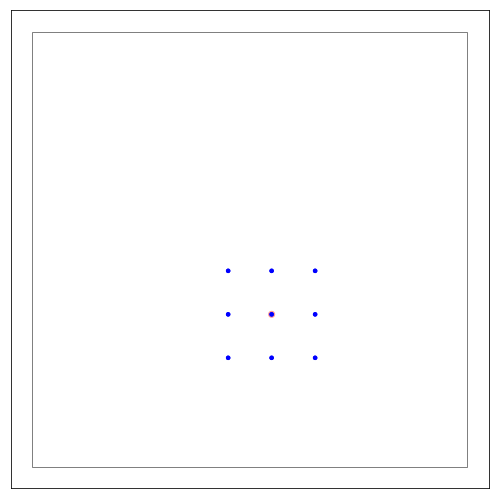

In [24]:
for i in [56, 57, 58]:
    topp.PlotTargets([i], ex_layer)
    plt.show()

In [21]:
nest.GetConnections([57])

(array('l', [57, 46, 0, 0, 0]),
 array('l', [57, 47, 0, 0, 1]),
 array('l', [57, 48, 0, 0, 2]),
 array('l', [57, 56, 0, 0, 3]),
 array('l', [57, 57, 0, 0, 4]),
 array('l', [57, 58, 0, 0, 5]),
 array('l', [57, 66, 0, 0, 6]),
 array('l', [57, 67, 0, 0, 7]),
 array('l', [57, 68, 0, 0, 8]),
 array('l', [57, 46, 0, 14, 0]),
 array('l', [57, 47, 0, 14, 1]),
 array('l', [57, 48, 0, 14, 2]),
 array('l', [57, 56, 0, 14, 3]),
 array('l', [57, 57, 0, 14, 4]),
 array('l', [57, 58, 0, 14, 5]),
 array('l', [57, 66, 0, 14, 6]),
 array('l', [57, 67, 0, 14, 7]),
 array('l', [57, 68, 0, 14, 8]))

### Simulate

Choose some neurons to be monitored

In [176]:
# GID to be stimulated
stid = [58, 60]
# GID to be monitored
monid = [57,58,59]

In [177]:
nest.SetStatus(stid, {"I_e": 376.0})

In [178]:
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})

spikedetector = nest.Create("spike_detector",
                params={"withgid": True, "withtime": True})

In [179]:
nest.Connect(multimeter, monid)
nest.Connect(monid, spikedetector)

In [180]:
sim_len = 1000.0
nest.Simulate(sim_len)

In [181]:
dmm = nest.GetStatus(multimeter)[0]
ts = dmm["events"]["times"]
Vms = dmm["events"]["V_m"]

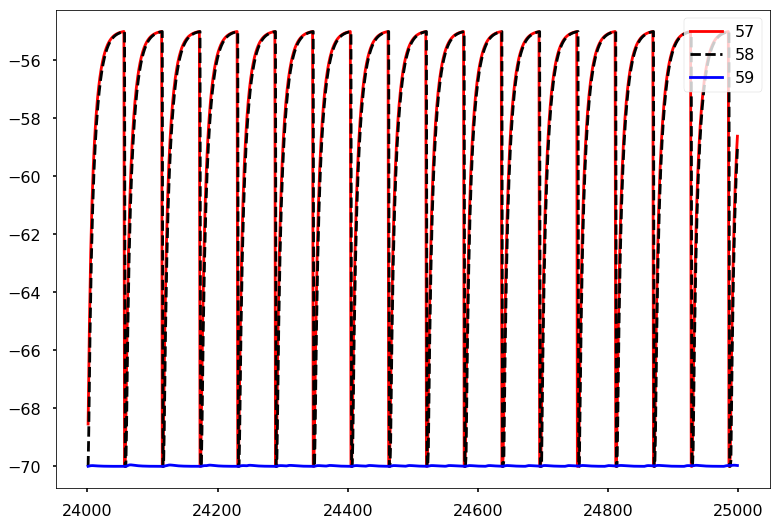

In [182]:
sep= len(monid)

plt.plot(ts[::sep], Vms[::sep], '-r',label=str(monid[0]) )
plt.plot(ts[1::sep], Vms[1::sep], '--k',label=str(monid[1]))
plt.plot(ts[2::sep], Vms[2::sep], '-b',label=str(monid[2]))

plt.legend(loc=1)
plt.show()

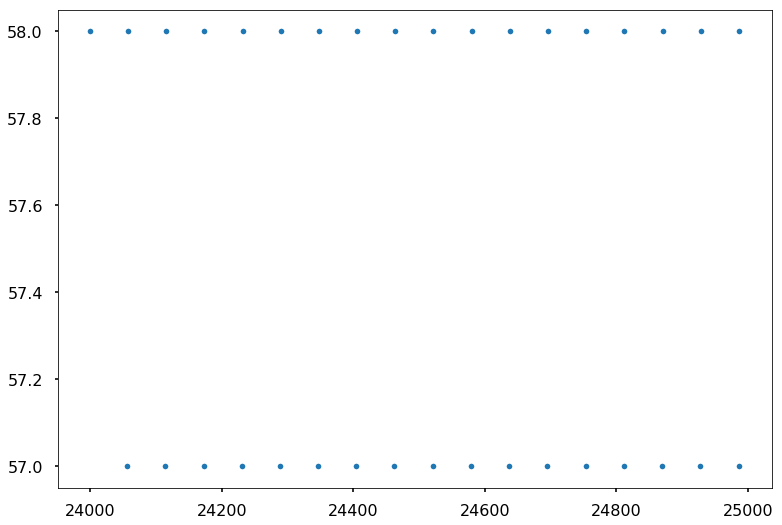

In [183]:
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
plt.plot(ts, evs, ".")
plt.show()